<a href="https://colab.research.google.com/github/TriaPutra/Tugas_Python/blob/main/Tugas_m14_Trianusa_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA  : TRIANUSA PUTRA
NIM   : 1101208130
KELAS : TTX-44-01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rumus Cost 231

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
LpUrban=cos(f,loc1,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

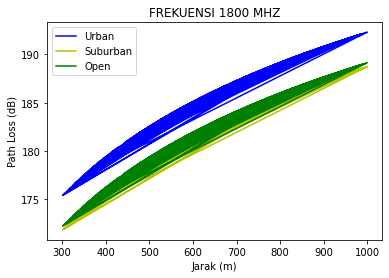

In [5]:
plt.figure()
plt.plot(d,LpUrban, 'b', label='Urban')
plt.plot(d,LpSuburban, 'y', label='Suburban')
plt.plot(d,LpOpen, 'g', label='Open')
plt.legend()
plt.title('FREKUENSI 1800 MHZ')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [6]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

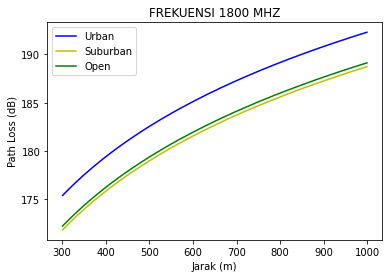

In [7]:
plt.figure()
plt.plot(d_sort,Urban_sort, 'b', label='Urban')
plt.plot(d_sort,Suburban_sort, 'y', label='Suburban')
plt.plot(d_sort,Open_sort, 'g', label='Open')
plt.legend()
plt.title('FREKUENSI 1800 MHZ')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# Mencari LP di 3 frekuensi

In [8]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz

In [9]:
LpUrban1=cos(f1,loc1,tower,user,d)
LpUrban2=cos(f2,loc1,tower,user,d)
LpUrban3=cos(f3,loc1,tower,user,d)

Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

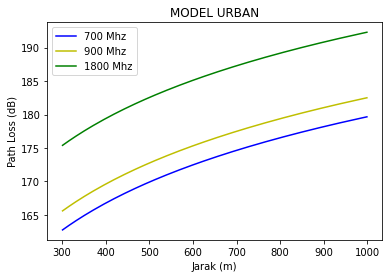

In [10]:
plt.figure()
plt.plot(d_sort,Urban1_sort, 'b', label='700 Mhz')
plt.plot(d_sort,Urban2_sort, 'y', label='900 Mhz')
plt.plot(d_sort,Urban3_sort, 'g', label='1800 Mhz')
plt.legend()
plt.title('MODEL URBAN')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# mencari Prx

In [11]:
#diketahui:
NtL = lambda x: 10*np.log10(x) #numerik to logaritmik
LtN = lambda x: 10**(x/10) #logaritmik to numerik
Ptx = 30000 #mili watt
Gtx = 10 #db
Grx = 2 #db

In [12]:
def Prx (Ptx, Lp, Gtx, Grx):
  Ptx_L = NtL(Ptx)
  prx_L = Ptx_L-Lp+Gtx+Grx
  Prx_N = LtN(prx_L)
  return Prx_N

In [13]:
PrxUrban = Prx (Ptx, Urban_sort, Gtx, Grx)
PrxSuburban = Prx (Ptx, Suburban_sort, Gtx, Grx)
PrxOpen = Prx (Ptx, Open_sort, Gtx, Grx)

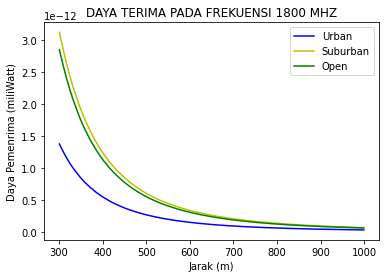

In [14]:
plt.figure()
plt.plot(d_sort,PrxUrban, 'b', label='Urban')
plt.plot(d_sort,PrxSuburban, 'y', label='Suburban')
plt.plot(d_sort,PrxOpen, 'g', label='Open')
plt.legend()
plt.title('DAYA TERIMA PADA FREKUENSI 1800 MHZ')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Pemenrima (miliWatt)')
plt.show()

In [15]:
PrxUrban1 = Prx (Ptx, Urban1_sort, Gtx, Grx)
PrxUrban2 = Prx (Ptx, Urban2_sort, Gtx, Grx)
PrxUrban3 = Prx (Ptx, Urban3_sort, Gtx, Grx)

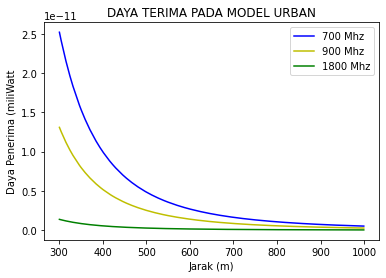

In [16]:
plt.figure()
plt.plot(d_sort,PrxUrban1, 'b', label='700 Mhz')
plt.plot(d_sort,PrxUrban2, 'y', label='900 Mhz')
plt.plot(d_sort,PrxUrban3, 'g', label='1800 Mhz')
plt.legend()
plt.title('DAYA TERIMA PADA MODEL URBAN')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Penerima (miliWatt')
plt.show()

# Mencari SNR

In [17]:
#diketahui
BW = 5000000 #Hz

In [18]:
def SNR (Prx, BW):
  Noise = -174 + 10*np.log10(BW)
  Noise_N = LtN(Noise)
  snr = Prx/Noise_N
  return snr

In [19]:
SNRUrban = SNR (PrxUrban, BW)
SNRSuburban = SNR (PrxSuburban, BW)
SNROpen = SNR (PrxOpen, BW)

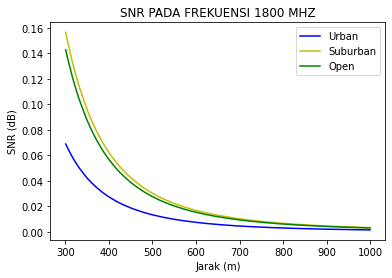

In [25]:
plt.figure()
plt.plot(d_sort,SNRUrban, 'b', label='Urban')
plt.plot(d_sort,SNRSuburban, 'y', label='Suburban')
plt.plot(d_sort,SNROpen, 'g', label='Open')
plt.legend()
plt.title('SNR PADA FREKUENSI 1800 MHZ')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [23]:
SNRUrban1 = SNR (PrxUrban1, BW)
SNRUrban2 = SNR (PrxUrban2, BW)
SNRUrban3 = SNR (PrxUrban3, BW)

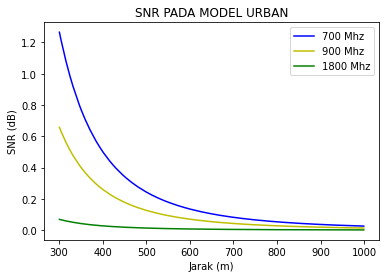

In [26]:
plt.figure()
plt.plot(d_sort,SNRUrban1, 'b', label='700 Mhz')
plt.plot(d_sort,SNRUrban2, 'y', label='900 Mhz')
plt.plot(d_sort,SNRUrban3, 'g', label='1800 Mhz')
plt.legend()
plt.title('SNR PADA MODEL URBAN')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

# Mencari Kapasitas Seluler

In [27]:
def Kapasitas (SNR, BW):
  kapasitas = BW*np.log2(1+SNR)
  return kapasitas

In [28]:
KapasitasUrban = Kapasitas (SNRUrban, BW)
KapasitasSuburban = Kapasitas (SNRSuburban, BW)
KapasitasOpen = Kapasitas (SNROpen, BW)

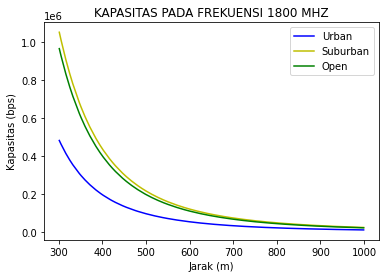

In [29]:
plt.figure()
plt.plot(d_sort,KapasitasUrban, 'b', label='Urban')
plt.plot(d_sort,KapasitasSuburban, 'y', label='Suburban')
plt.plot(d_sort,KapasitasOpen, 'g', label='Open')
plt.legend()
plt.title('KAPASITAS PADA FREKUENSI 1800 MHZ')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [31]:
KapasitasUrban1 = SNR (SNRUrban1, BW)
KapasitasUrban2 = SNR (SNRUrban2, BW)
KapasitasUrban3 = SNR (SNRUrban3, BW)

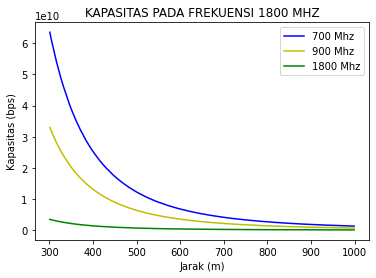

In [33]:
plt.figure()
plt.plot(d_sort,KapasitasUrban1, 'b', label='700 Mhz')
plt.plot(d_sort,KapasitasUrban2, 'y', label='900 Mhz')
plt.plot(d_sort,KapasitasUrban3, 'g', label='1800 Mhz')
plt.legend()
plt.title('KAPASITAS PADA FREKUENSI 1800 MHZ')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()